### Домашние задания

### Урок 3. Логистическая регрессия. Log Loss

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=2) 

In [2]:
%matplotlib inline
plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 14})

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64) # квалификация репетитора

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]) # подходит или нет репетитор

In [9]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [10]:
y

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [11]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])
X_st[2, :]

array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
       -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735])

$$Logloss=-y \ln(p) - (1-y)\ln(1-p)$$

In [12]:
def calc_logloss(y, y_pred): # Оценка модели
    err = np.mean(- y * np.log(y_pred) - (1.0 - y) * np.log(1.0 - y_pred))
    return err

#### Задание 2

In [14]:
#штраФ модели на ошибку, чем меньше, тем лучше
trigger=[]
iterator = 0.00001
x=0
while iterator !=0.99999:
    y_true = 0.9 - iterator
    y_pred = 0.1 + iterator
    trigger.append(calc_logloss(y_true, y_pred))
    if x ==0:
        x+=1
        iterator += 0.00001
        continue
    else:
        if trigger[x] > trigger[x-1] or trigger[x] < 0:
            iskomoe_znachenie = trigger[x-1]
            print(f"Значение функции calc_logloss минимально: {iskomoe_znachenie}, при аргументах y_true = {y_true}, y_pred ={y_pred}")
            break
        else:
            iterator += 0.00001
            #print(trigger[x])
            x+=1
            continue

Значение функции calc_logloss минимально: 0.6931471805599453, при аргументах y_true = 0.49998999999974075, y_pred =0.5000100000002593


### Logistic Regression

#### задание 3 и 4

In [15]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

def eval_LR_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[0]) # данная функция создает массив указанной формы и заполняет его случайными числами с плавающей точкой, которые выбраны из одномерного нормального (Гаусовского) распределения со средним значением равным 0 и дисперсией равной 1.
    n = X.shape[1]
    for i in range(1, iterations + 1):
        z = np.dot(w, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        w -= alpha * (1/n * np.dot((y_pred - y), X.T))# градиентный спуск при подборе параметров весов
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

#3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются веса, которые уже посчитаны функцией eval_LR_model и X, на выходе - массив y_pred_proba).
def calc_predict_p (W, X):
    pr = sigmoid(np.dot(W,X_st)) # веса перемножаются на признаки и применяется функция сигмоиды (вероятность от 0 до 1)
    return pr
#4.Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются веса, которые уже посчитаны функцией eval_LR_model и X, на выходе - массив y_pred).
def calc_pred (predict_):
    list_pred = []
    for x, y in enumerate(predict_):
        if y > 0.5:
            print(f"Значение {y}  № {x} принадлежит к классу 1")
            list_pred.append(1)
        else:
            print(f"Значение {y}  № {x} принадлежит к классу 0")
            list_pred.append(0)
    return list_pred




1000 [-0.29764618 -0.72670545  1.061634    1.39666497] 0.5233765331724747
2000 [-0.64214517 -0.81531815  1.11599369  1.72618787] 0.49941171738897017
3000 [-0.95627497 -0.87648865  1.10170056  2.00552673] 0.4812997915130281
4000 [-1.25395556 -0.91702026  1.05407927  2.24381099] 0.4663484120925518
5000 [-1.53718107 -0.94412619  0.98701591  2.45304376] 0.4534151021622755
6000 [-1.80709894 -0.96248191  0.90882535  2.64121123] 0.4419377780140083
7000 [-2.0646379  -0.97512726  0.82480965  2.81363531] 0.4316064579082126
8000 [-2.31061284 -0.98407392  0.73840308  2.97395036] 0.42222864967057394
9000 [-2.54576745 -0.99066711  0.65182927  3.12469136] 0.4136706162543685
10000 [-2.77079473 -0.99580928  0.56650766  3.2676589 ] 0.4058305387773311
Значение 0.25847878035031074  № 0 принадлежит к классу 0
Значение 0.3057150314319049  № 1 принадлежит к классу 0
Значение 0.8190665121215261  № 2 принадлежит к классу 1
Значение 0.2814946649704948  № 3 принадлежит к классу 0
Значение 0.7911779237366234  № 4

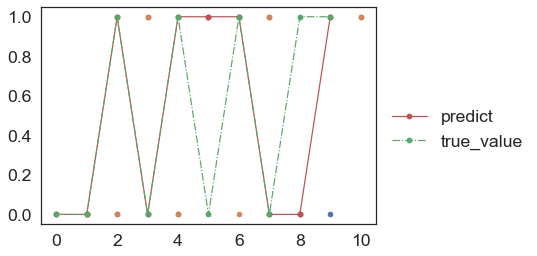

In [16]:
w = eval_LR_model(X_st, y, iterations=10000, alpha=1e-2) # подбор весов признаков
predict_ = calc_predict_p(w,X)
predict_
pr = calc_pred(predict_)
print(f"{pr}\n{y}")

plt.scatter([1,2,3,4,5,6,7,8,9,10],pr)
plt.scatter([1,2,3,4,5,6,7,8,9,10],y)


plt.plot(pr, 'o-r', label='predict')
plt.plot(y, 'o-.g', label='true_value')
plt.legend(bbox_to_anchor=(1, 0.6))

#### 5.Посчитайте accuracy, матрицу ошибок, precision и recall, а также F1-score.

In [114]:
accuracy = 100.0 - np.mean(np.abs(y - pr)*100.0)
accuracy

80.0

In [129]:
def metrica (pr, y):
    diff  = y - pr # дельты по классам
    summ_diff_0 = sum(i == -1 for i in diff) # tn
    summ_diff_1 = sum(i == 1 for i in diff) # fn
    
    CL_1 = sum(y==1) # класс 1
    CL_0 = sum(y==0) # класс 0
    
    TP = CL_1 - summ_diff_1 # из значений класса 1 вычитаем ложные срабатывания
    TN =  CL_2 - summ_diff_0 # из значений класса 0 вычитаем ложные срабатывания
    FP = summ_diff_1
    FN = summ_diff_0
    print(f'TP:{TP}')
    print(f'TN:{TN}')
    print(f'FN:{FN}')
    print(f'FP:{FP}')
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP+FN)
    FPR = FP / (FP + TN)
    F1_Score = 2 * (precision*recall)/(precision+recall)
    
    return accuracy, precision, recall, FPR, F1_Score, CL_1, CL_2

In [130]:
chto = metrica(pr,y)
print(f'''accuracy: {chto[0]}
precision: {chto[1]}
recall: {chto[2]}
FPR: {chto[3]}
F1_Score: {chto[4]}''')

TP:4
TN:4
FN:1
FP:1
accuracy: 0.8
precision: 0.8
recall: 0.8
FPR: 0.2
F1_Score: 0.8000000000000002


#### 6.Могла ли модель переобучиться? Почему?

In [ ]:
При маленьком количестве признаков модель имеет высокий риск переобучения.